In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (15,8)
sns.set_style('darkgrid')

# AutoDiff
- Tensorflow does not have a prewritten derivative code for each and every activation function. They have a module called as AutoDiff which takes care of differentiation of any given function
- GradientTape is a Tensorflow's mathematical tool for performing automatic differentiation
- Gradient tapes use memory to store intermediate results, including inputs and outputs, for use during the backwards pass.

Example:-

$f(x) = 3x^{2}$

$f'(x) = 6x$

if we assume x = 5

In [3]:
x = tf.constant(5.)
with tf.GradientTape() as tape:
    tape.watch(x)
    y = 3*x**2

dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor(30.0, shape=(), dtype=float32)


In [8]:
x = tf.constant(np.linspace(-6,6,100))

with tf.GradientTape(persistent=True) as tape:
    tape.watch(x)
    y1 = tf.keras.activations.sigmoid(x)
    y2 = tf.keras.activations.tanh(x)
    y3 = tf.keras.activations.relu(x)
    y4 = tf.keras.activations.relu(x, alpha=0.1)

In [9]:
dy1_dx = tape.gradient(y1, x)
dy2_dx = tape.gradient(y2, x)
dy3_dx = tape.gradient(y3, x)
dy4_dx = tape.gradient(y4, x)

# Sigmoid Activation

## sigmoid(z) = $\frac{1}{1+e^{z}}$, where z = wx + b

Here’s why sigmoid/logistic activation function is one of the most widely used functions:

- It is commonly used for models where we have to predict the probability as an output. Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice because of its range.
- The function is differentiable and provides a smooth gradient, i.e., preventing jumps in output values. This is represented by an S-shape of the sigmoid activation function. 

The limitations of sigmoid function are discussed below:

- The derivative of the function is f'(z) = sigmoid(z)*(1-sigmoid(z)). 

As we can see from the plot below, the gradient values are only significant for range maybe from -3 to 3, and the graph gets much flatter in other regions. 

It implies that for values greater than 3 or less than -3, the function will have very small gradients. As the gradient value approaches zero, the network ceases to learn and suffers from the Vanishing gradient problem.

The output of the logistic function is not symmetric around zero. So the output of all the neurons will be of the same sign. This makes the training of the neural network more difficult and unstable.

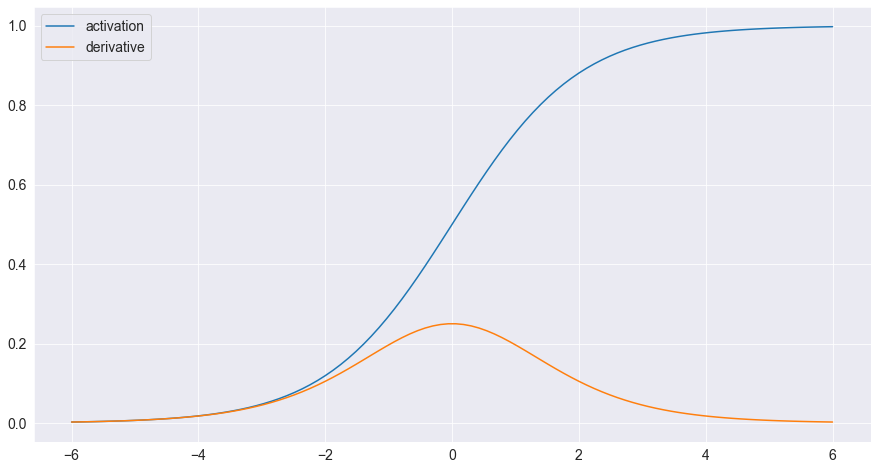

In [10]:
plt.plot(x,y1,label='activation')
plt.plot(x,dy1_dx,label='derivative')
plt.legend()
plt.show()

# Tanh Activation

## tanh(z) = $\frac{(e^{z}-e^{-z})}{(e^{z}+e^{-z})}$, where z = wx + b

Advantages of using this activation function are:

- The output of the tanh activation function is Zero centered; hence we can easily map the output values as strongly negative, neutral, or strongly positive.
- Usually used in hidden layers of a neural network as its values lie between -1 to; therefore, the mean for the hidden layer comes out to be 0 or very close to it. Convergence is usually faster if the average of each input variable over the training set is close to zero. Although it used to be a popular choice of activation in hidden layers it has been replaced by relu. However it is still used in many networks in hidden layers. It helps in centering the data and makes learning for the next layer much easier (handles the Internal Covariate Shift).
- The gradient of the tanh function is much steeper as compared to the sigmoid function.

Limitations of this function:
- It also faces the problem of vanishing gradients similar to the sigmoid activation function. (reason why its not used in deeper networks much nowadays because the NNs constructed these days are more deeper compared to years ago) 

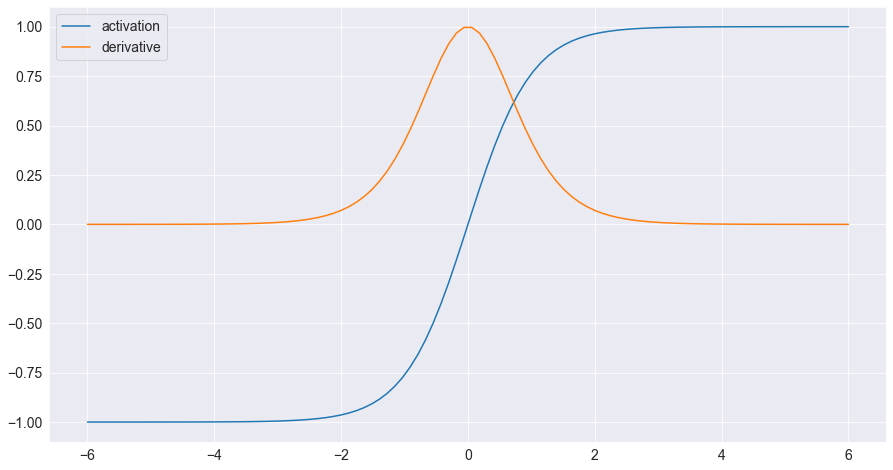

In [11]:
plt.plot(x,y2,label='activation')
plt.plot(x,dy2_dx,label='derivative')
plt.legend()
plt.show()

# ReLU Activation

## ReLU(z) = $max(0,z)$, where z = wx + b

The advantages of using ReLU as an activation function are as follows:

- Since only a certain number of neurons are activated, the ReLU function is far more computationally efficient when compared to the sigmoid and tanh functions.
- ReLU accelerates the convergence of gradient descent towards the global minimum of the loss function due to its non-saturating property. (gradient does not vanish)

The limitations faced by this function are:
 - The Dying ReLU problem, which I explained below.

The negative side of the graph makes the gradient value zero. Due to this reason, during the backpropagation process, the weights and biases for some neurons are not updated. This can create dead neurons which never get activated. 
- All the negative input values become zero immediately, which decreases the model’s ability to fit or train from the data properly. 

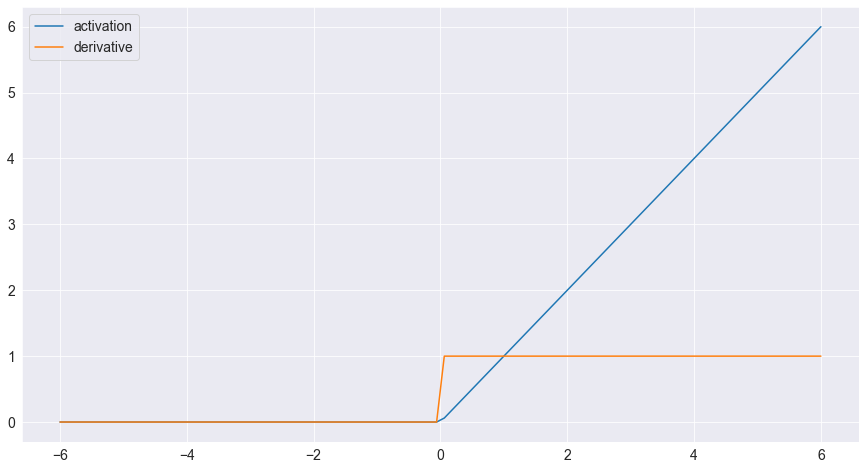

In [12]:
plt.plot(x,y3,label='activation')
plt.plot(x,dy3_dx,label='derivative')
plt.legend()
plt.show()

# Leaky ReLU Activation

## ReLU(z) = $max(0.1z,z)$, where z = wx + b

- Leaky ReLU is an improved version of ReLU function to solve the Dying ReLU problem as it has a small positive slope in the negative area.

The advantages of Leaky ReLU are same as that of ReLU, in addition to the fact that it does enable backpropagation, even for negative input values. 

By making this minor modification for negative input values, the gradient of the left side of the graph comes out to be a non-zero value. If you look at the plot closely the derivative value is a little above 0 at 0.1 Therefore, we would no longer encounter dead neurons in that region. 

The limitations that this function faces include:

The predictions may not be consistent for negative input values. 
The gradient for negative values is a small value that makes the learning of model parameters time-consuming.

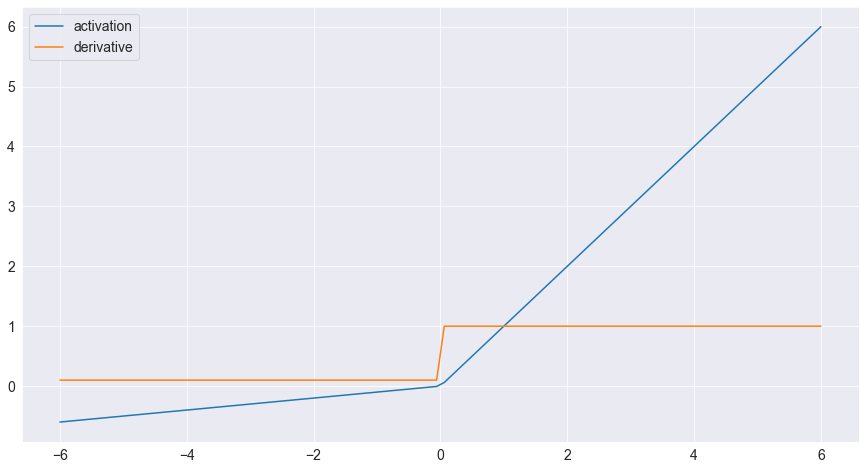

In [13]:
plt.plot(x,y4,label='activation')
plt.plot(x,dy4_dx,label='derivative')
plt.legend()
plt.show()

### Therefore there are also many more variants of relu activations that are used nowadays, you can read up on them. ReLU and Leaky ReLU are the most popular choices though.

# Co-adaptation

- Hidden layer of size 1 basically means there is just 1 neuron in the hidden layer which is nothing but a logistic regression
- Hidden layer of 2 or greater means multiple combinations of neurons are now being used to induce non linearity
- These multiple combinations of neurons are used to build the non linear functions, e.g. For 2 neurons you can see how it tries to create a non linear decision boundary 
- By the time the hidden layers are of 20-50 neurons you can see the complex non linear function being created to overfit the the data. This forced increase in neurons causes the problem of co-adapatation, multiple neurons being overly codependent to form a non linear function

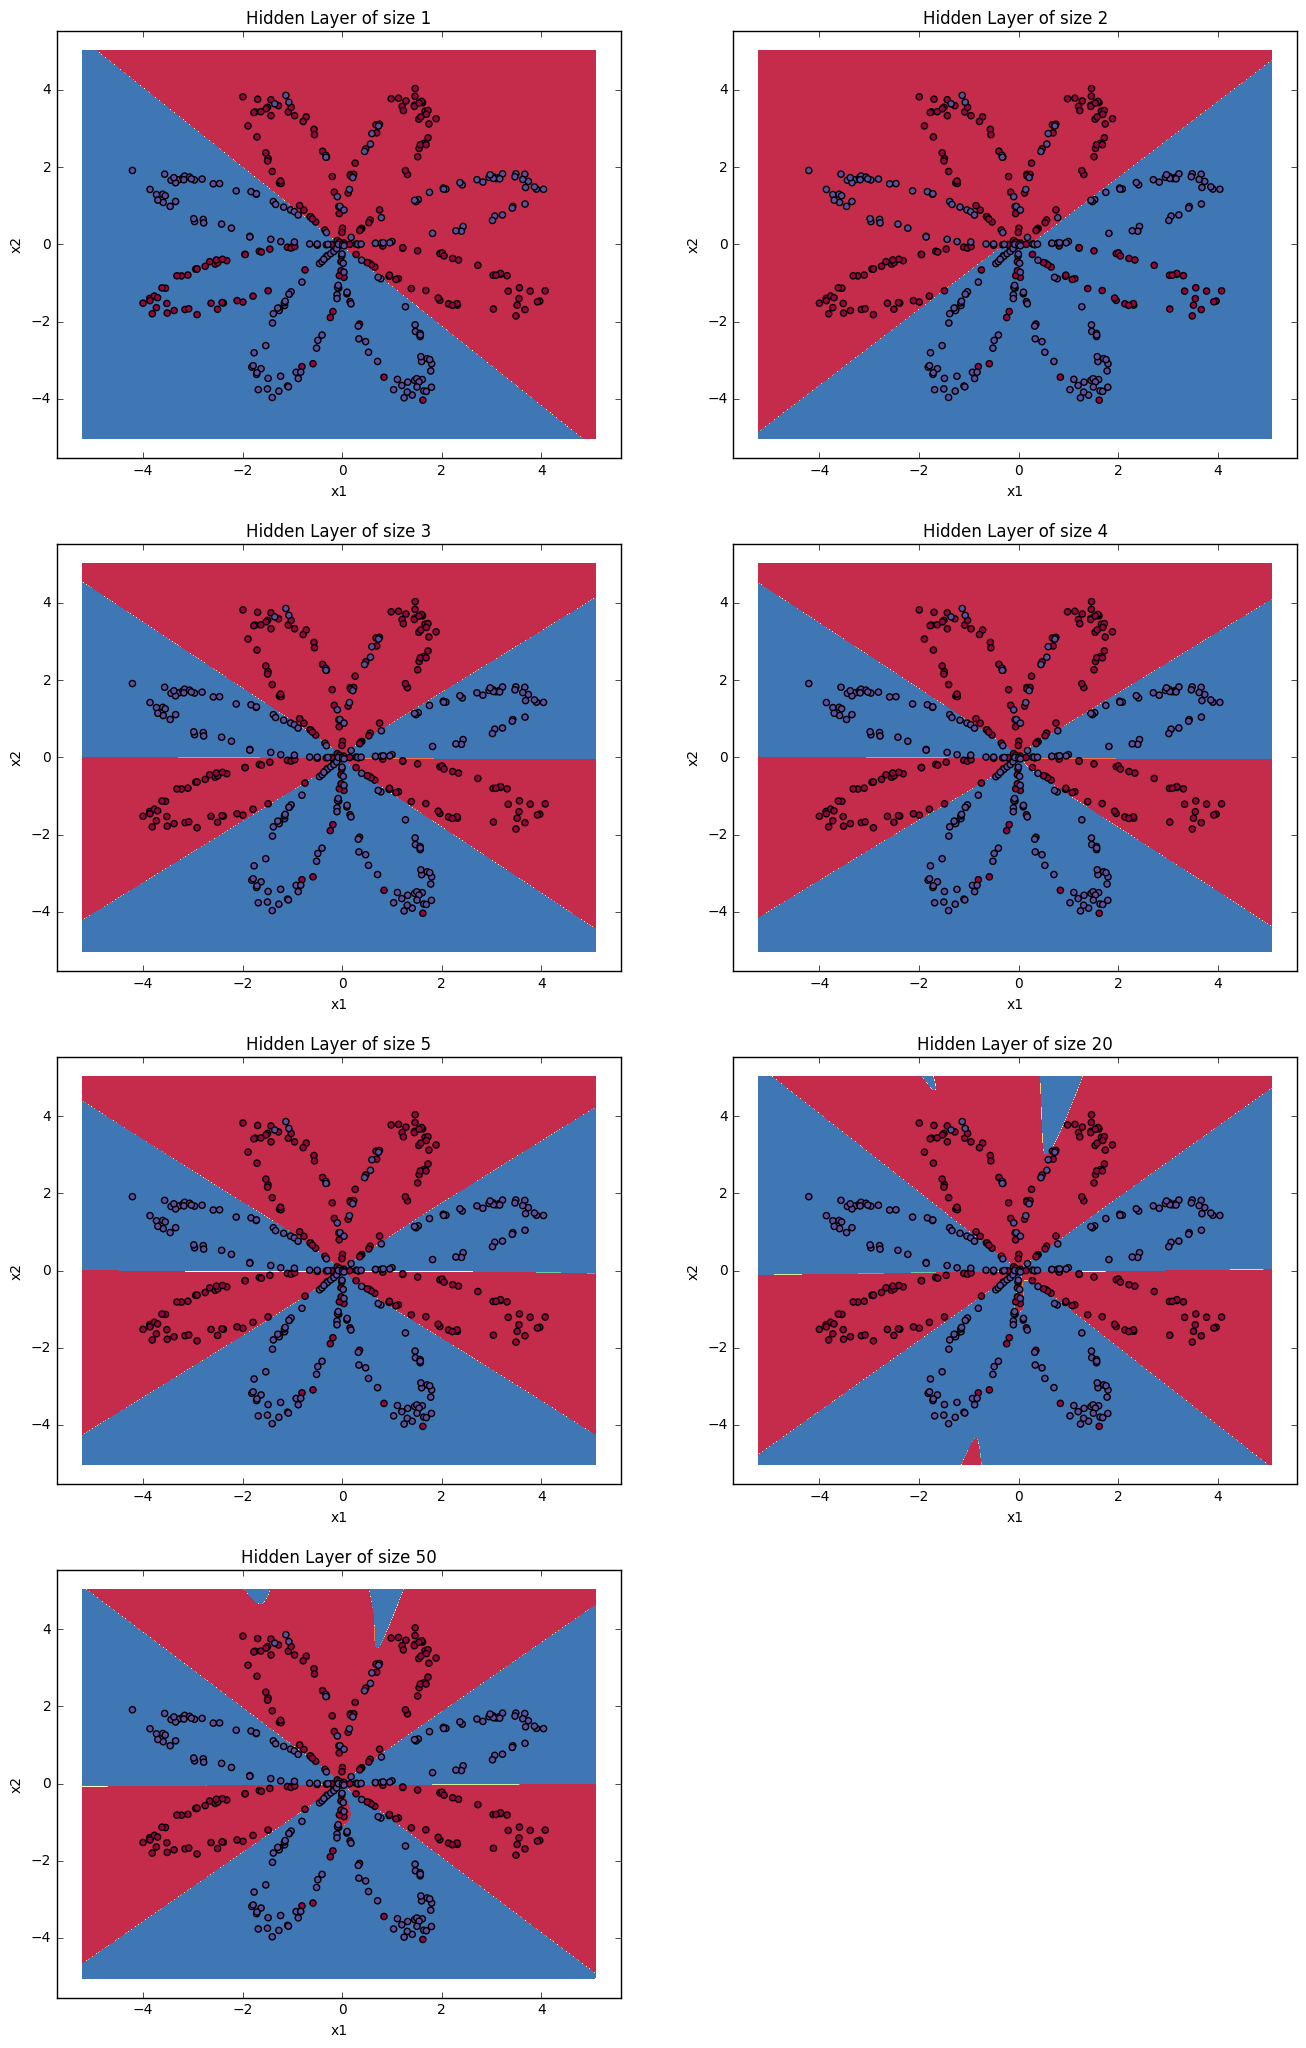

# Neural Network composed of multiple different activation functions

- A neural network is just a (big) mathematical function. You could even use different activation functions for different neurons in the same layer. Different activation functions allow for different non-linearities which might work better for solving a specific function.

A good stackoverflow answer:-

General Advice/Guidance

Neural networks are just approximations of a mathematical function, and the correct design will be based on answering the following questions/answers

How close does the approximation need to be, and how close can you train your network to approximate the function?
How well does the network generalize to datasets that it was not trained on? How well does it need to generalize?
Here's an extra one that I think is relevant to your question

How fast does the network need to perform? How does your choice of activation function hinder performance?
If you answer these questions, you'll have a better idea about your specific case.

Building a neural network with multiple activation functions is really muddying the waters and making the system more complicated than it needs to be.

# Internal Covariate Shift and Batch Normalization
- If you were confused with the white dogs and non white dogs example, the answer is simple the internal covariate shift is nothing but the change in the distribution of intermediate hidden layer outputs thus causing the weights/parameters of your network to adapt to the change in distribution in every training step. This slows down the training process. BatchNormalization scales the intermediate hidden layer outputs and smoothens the training process. 

## Covariate Shift
- The difference in training and testing data distribution for a fitted model is known as Covariate Shift. The plot below shows the distribution plot for only one variable but since the data can have multiple variables you need to imagine it. 

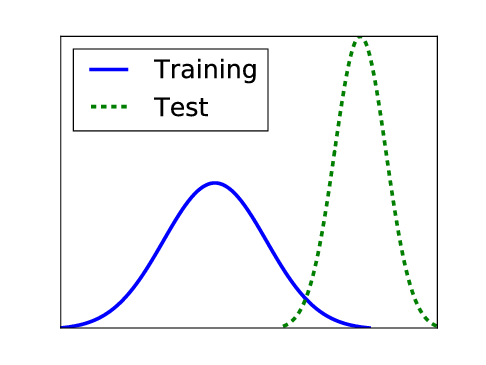

## Internal Covariate Shift
- The shift in the internal distribution of the intermediate hidden layer outputs due to different types of images being passed in each training step
- For example, the multiple distributions from different batches of data in different colors slow down the neural network to adapt to those changes during the training. BatchNormalization scales the distribution to a single common distribution shown in yellow.

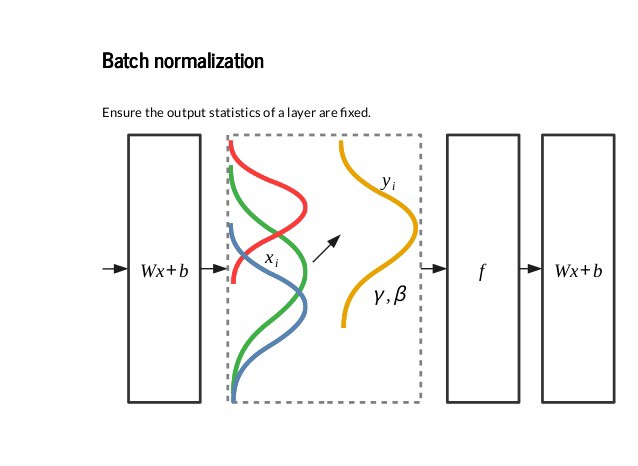